# Data Preprocessing

## Import Package & Read Data

In [1]:
# import package
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rcParams
from datetime import datetime as dt
from scipy import stats

In [2]:
df = pd.read_csv('marketing_campaign.csv', sep =';')
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,5,0,0,0,0,0,0,3,11,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

## Data Cleansing

### Drop Missing Value

In [4]:
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2216 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2216 non-null   int64  
 1   Year_Birth           2216 non-null   int64  
 2   Education            2216 non-null   object 
 3   Marital_Status       2216 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2216 non-null   int64  
 6   Teenhome             2216 non-null   int64  
 7   Dt_Customer          2216 non-null   object 
 8   Recency              2216 non-null   int64  
 9   MntWines             2216 non-null   int64  
 10  MntFruits            2216 non-null   int64  
 11  MntMeatProducts      2216 non-null   int64  
 12  MntFishProducts      2216 non-null   int64  
 13  MntSweetProducts     2216 non-null   int64  
 14  MntGoldProds         2216 non-null   int64  
 15  NumDealsPurchases    2216 non-null   i

### Drop Outlier

In [5]:
outlier = ['Year_Birth', 'Income', 'NumDealsPurchases', 'NumWebPurchases', 
           'NumCatalogPurchases', 'NumWebVisitsMonth']

z_scores = np.abs(stats.zscore(df[outlier]))
df = df[(z_scores < 3).all(axis=1)]

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2167 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2167 non-null   int64  
 1   Year_Birth           2167 non-null   int64  
 2   Education            2167 non-null   object 
 3   Marital_Status       2167 non-null   object 
 4   Income               2167 non-null   float64
 5   Kidhome              2167 non-null   int64  
 6   Teenhome             2167 non-null   int64  
 7   Dt_Customer          2167 non-null   object 
 8   Recency              2167 non-null   int64  
 9   MntWines             2167 non-null   int64  
 10  MntFruits            2167 non-null   int64  
 11  MntMeatProducts      2167 non-null   int64  
 12  MntFishProducts      2167 non-null   int64  
 13  MntSweetProducts     2167 non-null   int64  
 14  MntGoldProds         2167 non-null   int64  
 15  NumDealsPurchases    2167 non-null   i

## Feature Extraction & Encoding 

### Marital status

Menyederhanakan kategori marital status menjadi 2 kategori sekaligus me-encodingnya

In [6]:
map_marital = { 'Single' : 0,
               'Alone' : 0,
               'Absurd' : 0,
               'Divorced' : 0,
               'YOLO' : 0,
               'Widow' : 0,
               'Together' : 1,
               'Married' : 1 } 

df['Marital_Status'] = df['Marital_Status'].map(map_marital)

df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,0,58138.0,0,0,2012-09-04,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,0,46344.0,1,1,2014-03-08,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,1,71613.0,0,0,2013-08-21,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,1,26646.0,1,0,2014-02-10,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,1,58293.0,1,0,2014-01-19,94,173,...,5,0,0,0,0,0,0,3,11,0


### Education

Me-encoding tiap kategori di kolom education

In [7]:
edu = { 'Basic' : 0, '2n Cycle':1, 'Graduation' :2,
       'Master' : 3, 'PhD' : 4}
df['Education'] = df['Education'].map(edu)

df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,2,0,58138.0,0,0,2012-09-04,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,2,0,46344.0,1,1,2014-03-08,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,2,1,71613.0,0,0,2013-08-21,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,2,1,26646.0,1,0,2014-02-10,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,4,1,58293.0,1,0,2014-01-19,94,173,...,5,0,0,0,0,0,0,3,11,0


### Kidsorteen

Menggabungkan kolom kidshome dan teenhome, kemudian me-encodingnya dengan nilai 0 untuk yang tidak memiliki anak dan 1 untuk yang memiliki anak

In [8]:
df["kidsorteen"]=np.where((df["Kidhome"]+df["Teenhome"])!=0,1,0)
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,kidsorteen
0,5524,1957,2,0,58138.0,0,0,2012-09-04,58,635,...,0,0,0,0,0,0,3,11,1,0
1,2174,1954,2,0,46344.0,1,1,2014-03-08,38,11,...,0,0,0,0,0,0,3,11,0,1
2,4141,1965,2,1,71613.0,0,0,2013-08-21,26,426,...,0,0,0,0,0,0,3,11,0,0
3,6182,1984,2,1,26646.0,1,0,2014-02-10,26,11,...,0,0,0,0,0,0,3,11,0,1
4,5324,1981,4,1,58293.0,1,0,2014-01-19,94,173,...,0,0,0,0,0,0,3,11,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,2,1,61223.0,0,1,2013-06-13,46,709,...,0,0,0,0,0,0,3,11,0,1
2236,4001,1946,4,1,64014.0,2,1,2014-06-10,56,406,...,0,0,0,1,0,0,3,11,0,1
2237,7270,1981,2,0,56981.0,0,0,2014-01-25,91,908,...,0,1,0,0,0,0,3,11,0,0
2238,8235,1956,3,1,69245.0,0,1,2014-01-24,8,428,...,0,0,0,0,0,0,3,11,0,1


### Generasi

Mengelompokkan usia pelanggan berdasarkan generasi dan me-encodenya

In [9]:
conditions = [
    (df['Year_Birth'] < 1965), 
    (df['Year_Birth'] < 1981),
    (df['Year_Birth'] < 1997)]
generation = [ 0, 1, 2]
df['Generasi'] = np.select(conditions, generation, default = df['Year_Birth'])

df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,kidsorteen,Generasi
0,5524,1957,2,0,58138.0,0,0,2012-09-04,58,635,...,0,0,0,0,0,3,11,1,0,0
1,2174,1954,2,0,46344.0,1,1,2014-03-08,38,11,...,0,0,0,0,0,3,11,0,1,0
2,4141,1965,2,1,71613.0,0,0,2013-08-21,26,426,...,0,0,0,0,0,3,11,0,0,1
3,6182,1984,2,1,26646.0,1,0,2014-02-10,26,11,...,0,0,0,0,0,3,11,0,1,2
4,5324,1981,4,1,58293.0,1,0,2014-01-19,94,173,...,0,0,0,0,0,3,11,0,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,2,1,61223.0,0,1,2013-06-13,46,709,...,0,0,0,0,0,3,11,0,1,1
2236,4001,1946,4,1,64014.0,2,1,2014-06-10,56,406,...,0,0,1,0,0,3,11,0,1,0
2237,7270,1981,2,0,56981.0,0,0,2014-01-25,91,908,...,1,0,0,0,0,3,11,0,0,2
2238,8235,1956,3,1,69245.0,0,1,2014-01-24,8,428,...,0,0,0,0,0,3,11,0,1,0


### Year_Customer

Me-encode customer berdasarkan tahun masuk yang berada pada data Dt_customer

In [10]:
#ubah year_birth dan Dt_customer menjadi datetime
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'])

df["Year_Customer"] = df["Dt_Customer"].apply(lambda x: x.year)
df.tail()

ycust  = { 2012: 0, 2013: 1, 2014: 2}

df['Year_Customer'] = df['Year_Customer'].map(ycust)
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,kidsorteen,Generasi,Year_Customer
0,5524,1957,2,0,58138.0,0,0,2012-09-04,58,635,...,0,0,0,0,3,11,1,0,0,0
1,2174,1954,2,0,46344.0,1,1,2014-03-08,38,11,...,0,0,0,0,3,11,0,1,0,2
2,4141,1965,2,1,71613.0,0,0,2013-08-21,26,426,...,0,0,0,0,3,11,0,0,1,1
3,6182,1984,2,1,26646.0,1,0,2014-02-10,26,11,...,0,0,0,0,3,11,0,1,2,2
4,5324,1981,4,1,58293.0,1,0,2014-01-19,94,173,...,0,0,0,0,3,11,0,1,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,2,1,61223.0,0,1,2013-06-13,46,709,...,0,0,0,0,3,11,0,1,1,1
2236,4001,1946,4,1,64014.0,2,1,2014-06-10,56,406,...,0,1,0,0,3,11,0,1,0,2
2237,7270,1981,2,0,56981.0,0,0,2014-01-25,91,908,...,0,0,0,0,3,11,0,0,2,2
2238,8235,1956,3,1,69245.0,0,1,2014-01-24,8,428,...,0,0,0,0,3,11,0,1,0,2


### Campaign_Result

Menggabungkan seluruh kolom accepted campaign dan meberikan nilai jika ada 1 saja diantara campaign tersebut yang diterima

In [11]:
#campaign ( gabungan 5 acptcampaign) : 5 --> 2, 0 no response at all, 1
df['campaign_result'] = np.where((df['AcceptedCmp1'] + df['AcceptedCmp2'] + df['AcceptedCmp3'] + df['AcceptedCmp4'] + df['AcceptedCmp5']) >=1, 1, 0)
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,kidsorteen,Generasi,Year_Customer,campaign_result
0,5524,1957,2,0,58138.0,0,0,2012-09-04,58,635,...,0,0,0,3,11,1,0,0,0,0
1,2174,1954,2,0,46344.0,1,1,2014-03-08,38,11,...,0,0,0,3,11,0,1,0,2,0
2,4141,1965,2,1,71613.0,0,0,2013-08-21,26,426,...,0,0,0,3,11,0,0,1,1,0
3,6182,1984,2,1,26646.0,1,0,2014-02-10,26,11,...,0,0,0,3,11,0,1,2,2,0
4,5324,1981,4,1,58293.0,1,0,2014-01-19,94,173,...,0,0,0,3,11,0,1,2,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,2,1,61223.0,0,1,2013-06-13,46,709,...,0,0,0,3,11,0,1,1,1,0
2236,4001,1946,4,1,64014.0,2,1,2014-06-10,56,406,...,1,0,0,3,11,0,1,0,2,1
2237,7270,1981,2,0,56981.0,0,0,2014-01-25,91,908,...,0,0,0,3,11,0,0,2,2,1
2238,8235,1956,3,1,69245.0,0,1,2014-01-24,8,428,...,0,0,0,3,11,0,1,0,2,0


### Spending

In [12]:
df["Spending"] = df["MntWines"] + df["MntMeatProducts"] + df["MntFishProducts"] + df["MntSweetProducts"] + df["MntGoldProds"]
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,kidsorteen,Generasi,Year_Customer,campaign_result,Spending
0,5524,1957,2,0,58138.0,0,0,2012-09-04,58,635,...,0,0,3,11,1,0,0,0,0,1529
1,2174,1954,2,0,46344.0,1,1,2014-03-08,38,11,...,0,0,3,11,0,1,0,2,0,26
2,4141,1965,2,1,71613.0,0,0,2013-08-21,26,426,...,0,0,3,11,0,0,1,1,0,727
3,6182,1984,2,1,26646.0,1,0,2014-02-10,26,11,...,0,0,3,11,0,1,2,2,0,49
4,5324,1981,4,1,58293.0,1,0,2014-01-19,94,173,...,0,0,3,11,0,1,2,2,0,379
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,2,1,61223.0,0,1,2013-06-13,46,709,...,0,0,3,11,0,1,1,1,0,1298
2236,4001,1946,4,1,64014.0,2,1,2014-06-10,56,406,...,0,0,3,11,0,1,0,2,1,444
2237,7270,1981,2,0,56981.0,0,0,2014-01-25,91,908,...,0,0,3,11,0,0,2,2,1,1193
2238,8235,1956,3,1,69245.0,0,1,2014-01-24,8,428,...,0,0,3,11,0,1,0,2,0,813


## Feature Selection

In [13]:
df = df.drop(['ID','MntWines','MntMeatProducts','MntGoldProds','MntFruits','MntSweetProducts','MntFishProducts', 'AcceptedCmp1','AcceptedCmp2','AcceptedCmp3','AcceptedCmp4','AcceptedCmp5','Kidhome', 'Teenhome', 'Z_CostContact', 'Z_Revenue','Dt_Customer'], axis = 1)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2167 entries, 0 to 2239
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Year_Birth           2167 non-null   int64  
 1   Education            2167 non-null   int64  
 2   Marital_Status       2167 non-null   int64  
 3   Income               2167 non-null   float64
 4   Recency              2167 non-null   int64  
 5   NumDealsPurchases    2167 non-null   int64  
 6   NumWebPurchases      2167 non-null   int64  
 7   NumCatalogPurchases  2167 non-null   int64  
 8   NumStorePurchases    2167 non-null   int64  
 9   NumWebVisitsMonth    2167 non-null   int64  
 10  Complain             2167 non-null   int64  
 11  Response             2167 non-null   int64  
 12  kidsorteen           2167 non-null   int32  
 13  Generasi             2167 non-null   int64  
 14  Year_Customer        2167 non-null   int64  
 15  campaign_result      2167 non-null   i

## Feature Transformation

### Cek Distribusi

In [14]:
pd.set_option('display.max_columns', None)
df.head()

,Year_Birth,Education,Marital_Status,Income,Recency,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain,Response,kidsorteen,Generasi,Year_Customer,campaign_result,Spending
0,1957,2,0,58138.0,58,3,8,10,4,7,0,1,0,0,0,0,1529
1,1954,2,0,46344.0,38,2,1,1,2,5,0,0,1,0,2,0,26
2,1965,2,1,71613.0,26,1,8,2,10,4,0,0,0,1,1,0,727
3,1984,2,1,26646.0,26,2,2,0,4,6,0,0,1,2,2,0,49
4,1981,4,1,58293.0,94,5,5,3,6,5,0,0,1,2,2,0,379


Berdasarkan tabel diatas, terdapat 8 kolom yang bersifat numerik continous. Sebelum melakukan feature transformation, perebaran data perlu diketahui menggunakan KDE Plot

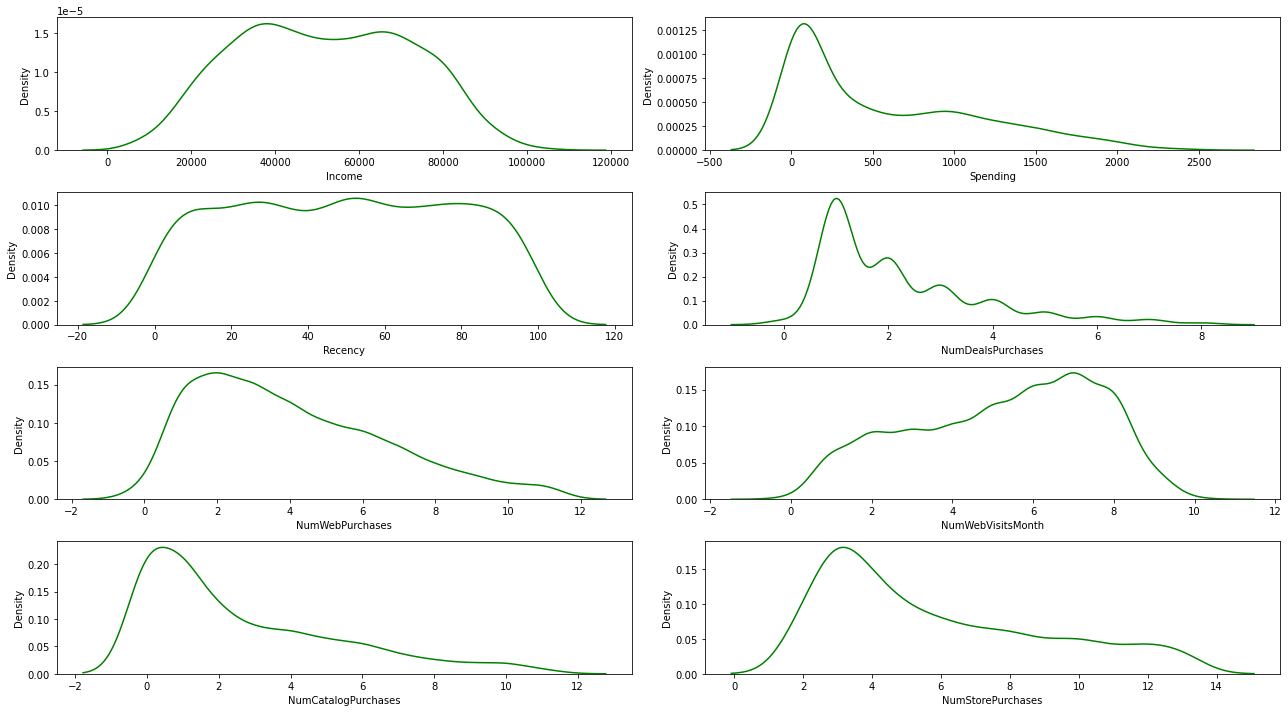

In [16]:
#kde plot kolom numerik
numerical = ['Income','Spending','Recency','NumDealsPurchases','NumWebPurchases','NumWebVisitsMonth' , 'NumCatalogPurchases', 'NumStorePurchases']
plt.figure(figsize = (18,10))
for kolom in range(0, len(numerical)):
  plt.subplot(4,2, kolom+1)
  sns.kdeplot(x=df[numerical[kolom]], color='green')
  plt.xlabel(numerical[kolom])
  plt.tight_layout()

Ketentuan feature transformation: <br>
1. Data balance-skewed: Perlu dilakukan normalisasi <br>
Berdasarkan grafik diatas, kolom yang bersifat balance skewed adalah <b> income,**recency** dan NumWebVisitsMonth </b>
2. Data right-skewed: Perlu Log transformation dan normalisasi <br>
Berdasarkan grafik diatas, kolom yang bersifat balance skewed adalah <b> Spending, NumDealsPurchases, NumWebPurchases,  NumCatalogPurchase , NumStorePurchases </b>

### Transformasi pada Data Balance-skewed (Normalisasi)

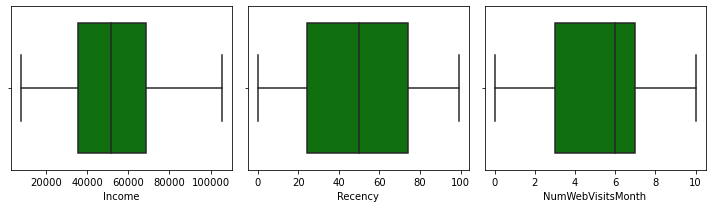

In [17]:
#kde plot kolom numerik
norm_kolom = ['Income','Recency','NumWebVisitsMonth']

#Sebelum Normalisasi
plt.figure(figsize = (10,3))
for kolom in range(0, len(norm_kolom)):
  plt.subplot(1,3, kolom+1)
  sns.boxplot(x=df[norm_kolom[kolom]], color='green')
  plt.xlabel(norm_kolom[kolom])
  plt.tight_layout()

Setelah Normalisasi


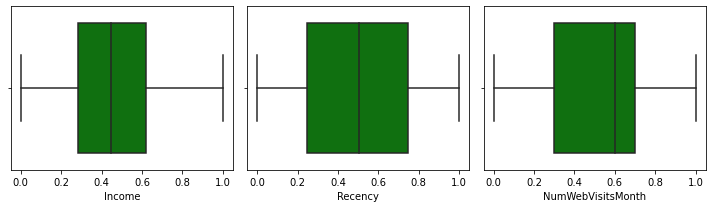

In [19]:
#Proses Normalisasi
from sklearn.preprocessing import MinMaxScaler
for kolom in norm_kolom:
  df[kolom] = MinMaxScaler().fit_transform(df[kolom].values.reshape(len(df), 1))

#Setelah Normalisasi
print("Setelah Normalisasi")
plt.figure(figsize = (10,3))
for kolom in range(0, len(norm_kolom)):
  plt.subplot(1,3, kolom+1)
  sns.boxplot(x=df[norm_kolom[kolom]], color='green')
  plt.xlabel(norm_kolom[kolom])
  plt.tight_layout()

### Transformasi pada Data Right-skewed (Log-Trans + Normalisasi)

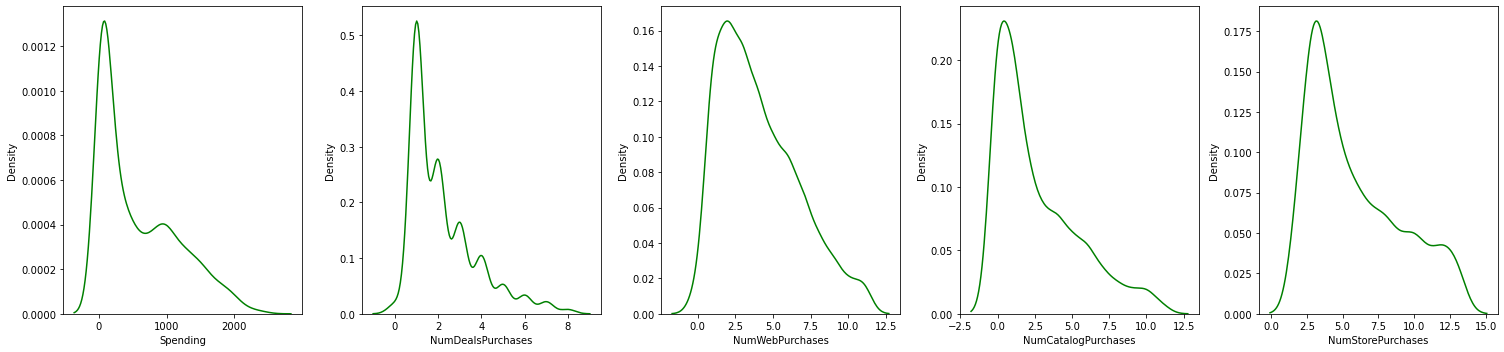

In [20]:
log_kolom = ['Spending','NumDealsPurchases','NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']


#Sebelum Log Transformation
plt.figure(figsize = (21,5))
for kolom in range(0, len(log_kolom)):
  plt.subplot(1,5, kolom+1)
  sns.kdeplot(x=df[log_kolom[kolom]], color='green')
  plt.xlabel(log_kolom[kolom])
  plt.tight_layout()

In [21]:
for kolom in log_kolom:
  print("Nilai Minimum kolom",kolom,":",df[kolom].min())

Nilai Minimum kolom Spending : 8
Nilai Minimum kolom NumDealsPurchases : 0
Nilai Minimum kolom NumWebPurchases : 0
Nilai Minimum kolom NumCatalogPurchases : 0
Nilai Minimum kolom NumStorePurchases : 2


Karena ada kolom yang bernilai 0, maka data perlu digeser sejauh 0,1

In [23]:
for kolom in log_kolom:
  df[kolom] = df[kolom]+0.1

for kolom in log_kolom:
  print("Nilai Minimum kolom",kolom,":",df[kolom].min())

Nilai Minimum kolom Spending : 8.1
Nilai Minimum kolom NumDealsPurchases : 0.1
Nilai Minimum kolom NumWebPurchases : 0.1
Nilai Minimum kolom NumCatalogPurchases : 0.1
Nilai Minimum kolom NumStorePurchases : 2.1


Dengan tidak adanya nilai 0, maka kolom siap untuk dilakukan log transformation

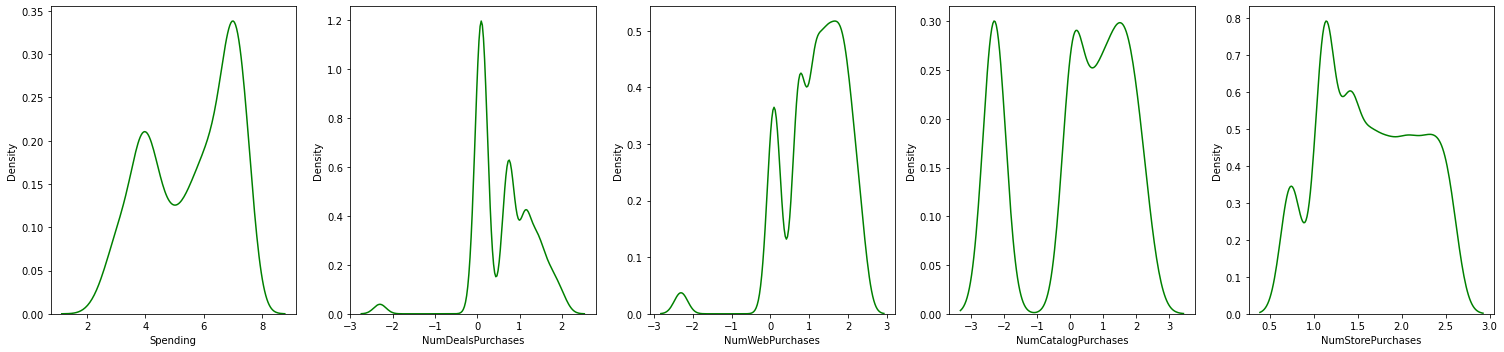

In [25]:
#Proses Log Transformation
for kolom in log_kolom:
  df[kolom] = np.log(df[kolom])

#Setelah Log Transformation
plt.figure(figsize = (21,5))
for kolom in range(0, len(log_kolom)):
  plt.subplot(1,5, kolom+1)
  sns.kdeplot(x=df[log_kolom[kolom]], color='green')
  plt.xlabel(log_kolom[kolom])
  plt.tight_layout()

Setelah Normalisasi


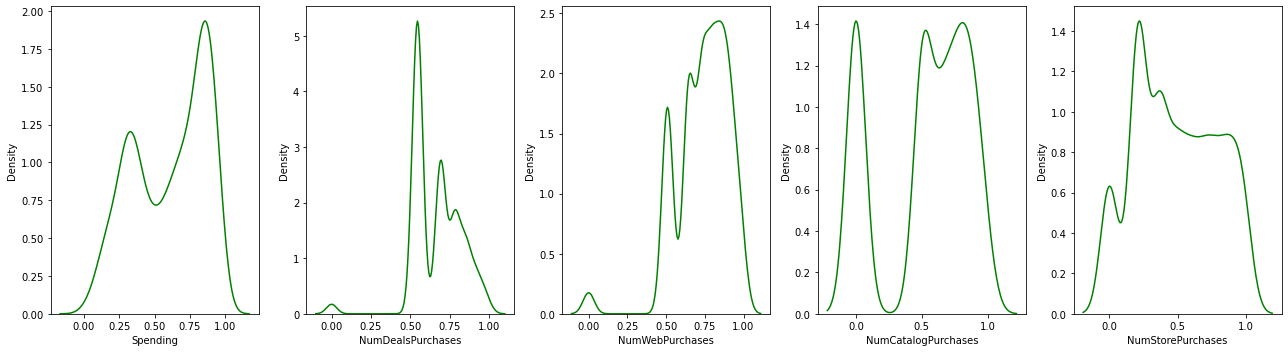

In [26]:
#Proses Normalisasi
log_kolom = ['Spending','NumDealsPurchases','NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']

from sklearn.preprocessing import MinMaxScaler
for kolom in log_kolom:
  df[kolom] = MinMaxScaler().fit_transform(df[kolom].values.reshape(len(df), 1))

#Setelah Normalisasi
print("Setelah Normalisasi")
plt.figure(figsize = (18,5))

for kolom in range(0, len(log_kolom)):
  plt.subplot(1,5, kolom+1)
  sns.kdeplot(x=df[log_kolom[kolom]], color='green')
  plt.xlabel(log_kolom[kolom])
  plt.tight_layout()

### Cek Distribusi Setelah Transformasi

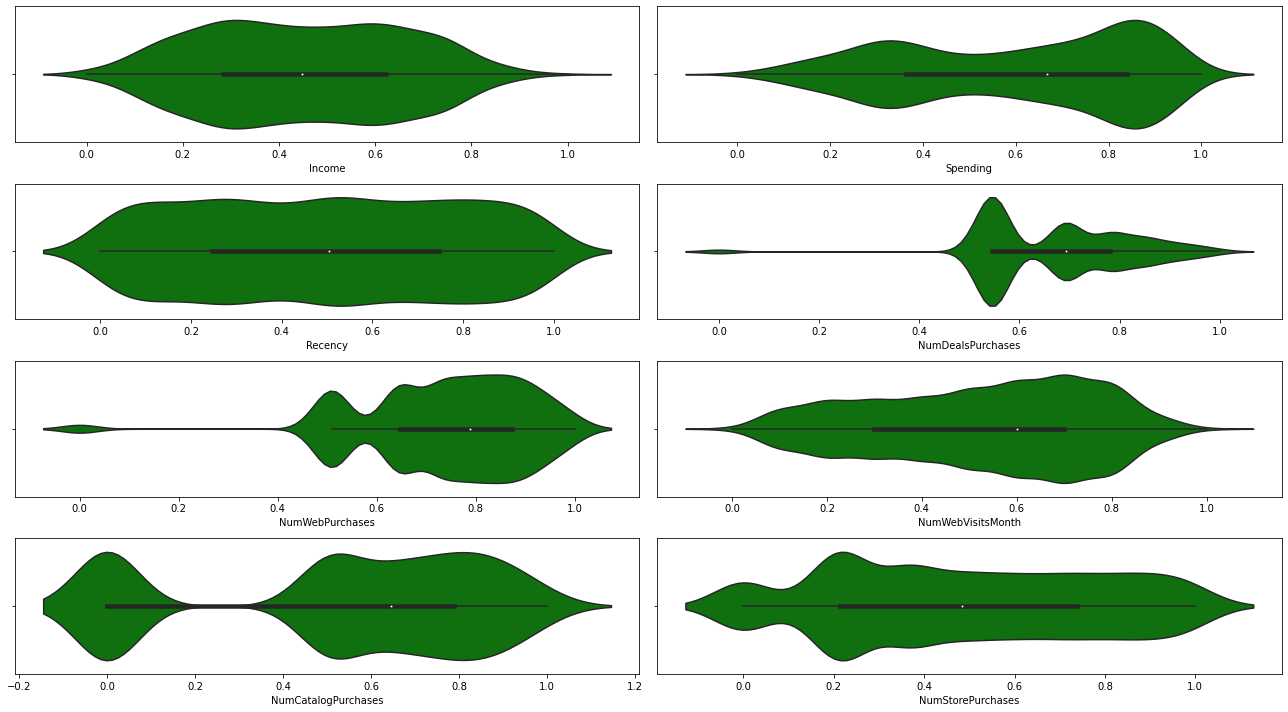

In [27]:
#kde plot kolom numerik
numerical = ['Income','Spending','Recency','NumDealsPurchases','NumWebPurchases','NumWebVisitsMonth' , 'NumCatalogPurchases', 'NumStorePurchases']
plt.figure(figsize = (18,10))
for kolom in range(0, len(numerical)):
  plt.subplot(4,2, kolom+1)
  sns.violinplot(x=df[numerical[kolom]], color='green')
  plt.xlabel(numerical[kolom])
  plt.tight_layout()

Setelah melalui feature transformation, persebaran data numerik menjadi lebih balance-skewed dengan range berkisar antara 0 sampai 1

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2167 entries, 0 to 2239
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Year_Birth           2167 non-null   int64  
 1   Education            2167 non-null   int64  
 2   Marital_Status       2167 non-null   int64  
 3   Income               2167 non-null   float64
 4   Recency              2167 non-null   float64
 5   NumDealsPurchases    2167 non-null   float64
 6   NumWebPurchases      2167 non-null   float64
 7   NumCatalogPurchases  2167 non-null   float64
 8   NumStorePurchases    2167 non-null   float64
 9   NumWebVisitsMonth    2167 non-null   float64
 10  Complain             2167 non-null   int64  
 11  Response             2167 non-null   int64  
 12  kidsorteen           2167 non-null   int32  
 13  Generasi             2167 non-null   int64  
 14  Year_Customer        2167 non-null   int64  
 15  campaign_result      2167 non-null   i

In [29]:
df.describe()

,Year_Birth,Education,Marital_Status,Income,Recency,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain,Response,kidsorteen,Generasi,Year_Customer,campaign_result,Spending
count,2167.000000,2167.000000,2167.000000,2167.000000,2167.000000,2167.000000,2167.000000,2167.000000,2167.000000,2167.000000,2167.000000,2167.000000,2167.000000,2167.000000,2167.000000,2167.000000,2167.000000
mean,1968.964928,2.452238,0.645593,0.452095,0.497014,0.665557,0.738966,0.524762,0.486416,0.527596,0.009229,0.149515,0.712506,0.825565,1.032303,0.209045,0.606627
std,11.717854,1.003412,0.478444,0.209469,0.291751,0.155373,0.170907,0.339034,0.298030,0.228175,0.095647,0.356678,0.452698,0.701556,0.685471,0.406720,0.259687
min,1940.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1959.000000,2.000000,0.000000,0.283594,0.247475,0.545665,0.646460,0.000000,0.212744,0.300000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.364492
50%,1970.000000,2.000000,1.000000,0.447224,0.505051,0.692811,0.788523,0.646460,0.484686,0.600000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.667009
75%,1978.000000,3.000000,1.000000,0.622501,0.747475,0.781437,0.872884,0.788523,0.737393,0.700000,0.000000,0.000000,1.000000,1.000000,2.000000,0.000000,0.839294
max,1996.000000,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,2.000000,1.000000,1.000000


## Class Imbalance

In [31]:
# pemisahan features vs target
X = df[[col for col in df.columns if (str(df[col].dtype) != 'object') and col not in ['Response']]]
y = df['Response'].values
print(X.shape)
print(y.shape)

(2167, 16)
(2167,)


In [34]:
from imblearn import under_sampling, over_sampling
X_over, y_over = over_sampling.RandomOverSampler().fit_resample(X, y)
X_over_SMOTE, y_over_SMOTE = over_sampling.SMOTE().fit_resample(X, y)

In [35]:
print('Original')
print(pd.Series(y).value_counts())
print('\n')
print('OVERSAMPLING')
print(pd.Series(y_over).value_counts())
print('\n')
print('SMOTE')
print(pd.Series(y_over_SMOTE).value_counts())

Original
0    1843
1     324
dtype: int64


OVERSAMPLING
1    1843
0    1843
dtype: int64


SMOTE
1    1843
0    1843
dtype: int64
